In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from datetime import datetime
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set_style("whitegrid")

# Import Dataset

In [2]:
noshows = pd.read_csv('dataset/medical-appointment-no-shows/No-show-Issue-Comma-300k.csv')
noshows.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


# Data Exploration

In [5]:
noshows.describe()

,Age,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,37.808017,0.077967,0.025010,0.215890,0.020523,0.052370,0.096897,0.000450,0.574173,-13.841813
std,22.809014,0.268120,0.156156,0.411439,0.155934,0.222772,0.295818,0.021208,0.499826,15.687697
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-398.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-20.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-4.000000
max,113.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.000000,-1.000000


In [20]:
# Handcap --> Handicap
# AwaitingTime --> WaitTime 
# HiperTension --> Hypertension
# Sms_Reminder --> SMS_received 
noshows.columns

Index(['Age', 'Gender', 'AppointmentRegistration', 'ApointmentData',
       'DayOfTheWeek', 'Status', 'Diabetes', 'Alcoolism', 'HiperTension',
       'Handcap', 'Smokes', 'Scholarship', 'Tuberculosis', 'Sms_Reminder',
       'AwaitingTime'],
      dtype='object')

In [8]:
noshows.groupby('Status').size()

Status
No-Show     90731
Show-Up    209269
dtype: int64

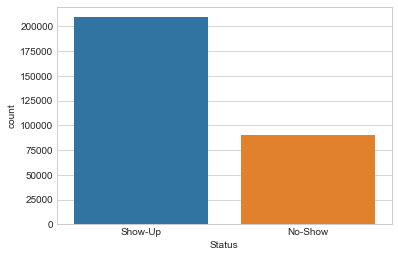

In [18]:
sns.countplot(x="Status", data=noshows)

In [15]:
# Nagative age should be fixed
noshows[noshows['Age'] < 0]['Age'].value_counts()

-1    5
-2    1
Name: Age, dtype: int64

In [12]:
noshows[noshows['Age'] > 100]['Age'].value_counts()

101    13
103     4
102     4
113     3
104     2
108     1
Name: Age, dtype: int64

In [32]:
noshows['Sms_Reminder'].value_counts()

1    170654
0    128547
2       799
Name: Sms_Reminder, dtype: int64

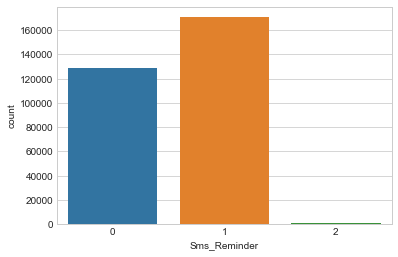

In [29]:
# sns.countplot(x="Sms_Reminder", data=noshows[noshows['Sms_Reminder'] > 0])
sns.countplot(x="Sms_Reminder", data=noshows)

In [19]:
# All 'AwaitingTime' are negative should fixed with absolute 
noshows[noshows['AwaitingTime'] > 0]['AwaitingTime'].value_counts()

Series([], Name: AwaitingTime, dtype: int64)

In [22]:
noshows[noshows['AwaitingTime'] <= -365]['AwaitingTime'].value_counts()

-398    1
Name: AwaitingTime, dtype: int64

In [9]:
noshows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
Age                        300000 non-null int64
Gender                     300000 non-null object
AppointmentRegistration    300000 non-null object
ApointmentData             300000 non-null object
DayOfTheWeek               300000 non-null object
Status                     300000 non-null object
Diabetes                   300000 non-null int64
Alcoolism                  300000 non-null int64
HiperTension               300000 non-null int64
Handcap                    300000 non-null int64
Smokes                     300000 non-null int64
Scholarship                300000 non-null int64
Tuberculosis               300000 non-null int64
Sms_Reminder               300000 non-null int64
AwaitingTime               300000 non-null int64
dtypes: int64(10), object(5)
memory usage: 28.6+ MB


### Rename  
Handcap --> Handicap  
AwaitingTime --> WaitTime   
HiperTension --> Hypertension  
Sms_Reminder --> SMS_received  

### Negative age  
Nagative age should be fixed

### Absolute 'AwaitingTime'  
All 'AwaitingTime' are negative should fixed with absolute 

### Convert quality   
Gender	--> GenderB (M=0, F=1)  
AppointmentRegistration	--> ScheduledDay (datetime64)    
ApointmentData	--> AppointmentDay (datetime64)  
DayOfTheWeek --> dayofweek (0-6)  
Status --> No-showB (Show-Up=0, No-Show=1)